# Libraries

In [7]:
!pip install -U tensorboard_plugin_profile

     |████████████████████████████████| 1.2 MB 19.7 MB/s eta 0:00:01


In [1]:
pip install git+https://github.com/rabernat/xbatcher.git

  Cloning https://github.com/rabernat/xbatcher.git to /tmp/pip-req-build-rq9yrt6z
  Running command git clone -q https://github.com/rabernat/xbatcher.git /tmp/pip-req-build-rq9yrt6z
  Created wheel for xbatcher: filename=xbatcher-0.1.0-py3-none-any.whl size=6245 sha256=6837f2db312f2093daae603e425f9991095a51ab49c67681d9d6750e2c9916ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-xwletsc1/wheels/0f/49/4c/0ecb2095c658d3b579c043c3be2b22c8740af6fab920456d6f
Successfully built xbatcher
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install git+https://github.com/rabernat/xbatcher.git

  Cloning https://github.com/rabernat/xbatcher.git to /tmp/pip-req-build-c1il4qpf
  Running command git clone -q https://github.com/rabernat/xbatcher.git /tmp/pip-req-build-c1il4qpf
  Created wheel for xbatcher: filename=xbatcher-0.1.0-py3-none-any.whl size=6245 sha256=ee4ddccc165718708b2080df4a3f4175ec2a180cbd45ff6fb1e09fc318f7bef6
  Stored in directory: /tmp/pip-ephem-wheel-cache-11psq3hl/wheels/0f/49/4c/0ecb2095c658d3b579c043c3be2b22c8740af6fab920456d6f
Successfully built xbatcher
Note: you may need to restart the kernel to use updated packages.


In [8]:
%matplotlib inline
import pandas as pd
import _pickle as pickle
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

print("TensorFlow version: ", tf.__version__)
import os
import sys 
import pickle as pk
import  pickle
from datetime import datetime
import pandas as pd
import requests
import urllib.request
import time
from bs4 import BeautifulSoup
#import nctoolkit as ncµ
import netCDF4 as nc4
import threading
import datetime as dt  # Python standard library datetime  module
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xbatcher as xb

import imageio
os.environ['PROJ_LIB'] = '/opt/python3-anaconda50-5.0.1-7ipsl.el6/share/proj'

import tensorflow as tf
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from skimage.measure import block_reduce


TensorFlow version:  2.3.0


In [2]:
#reload support file 
import sys
import os
# py_file_location = "/homedata/scros/DeepPV/"
# sys.path.append(os.path.abspath(py_file_location))
import read_cloudalbedo_files, cloud_index_functions, write_cloud_index_files
import CAL_CMV_Generator
from read_cloudalbedo_files import *
from CAL_CMV_Generator import CAL_CMV_DataGenerator
import importlib
importlib.reload(read_cloudalbedo_files)
importlib.reload(CAL_CMV_Generator)
# importlib.reload(write_cloud_index_files)

<module 'CAL_CMV_Generator' from '/home/dbennour/DeepPV/CAL_CMV_Generator.py'>

In [5]:
%load_ext tensorboard

# Train/Test data

In [18]:
#Train data
dirout='/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/'
train_list=os.listdir('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/')
train_datasets=[]
for file in file_list:
    train_datasets.append(xr.open_dataset(dirout+file))

In [4]:
#Test data
test_path='/homedata/dbennour/DeepPV/CAL_CMV_annual/test_data/'
# test=xr.open_dataset(test_path)


In [5]:
test=xr.open_dataset('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/CAL_CMV_201601010000_201601010015.nc')

In [ ]:
test.get(['CMV_X','CMV_Y'])

In [7]:
with xr.open_dataset('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/CAL_CMV_201601010000_201601010015.nc') as test:
    inpuut=test[['CAL_T0','CAL_T0-15']]
    output=test[['CMV_X','CMV_Y']]
    test.load()
    

In [12]:
in_arr=inpuut.to_array().values

In [3]:
#Train/Test samples
train_list=os.listdir('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/')[:10]
test_list=os.listdir('/homedata/dbennour/DeepPV/CAL_CMV_slot/test_data/')[:6]
dirout='/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/'
X_train_datasets=[]
Y_train_datasets=[]
X_train=np.empty((len(train_list),513,513,2))
Y_train=np.empty((len(train_list),513,513,2))
for i,file in enumerate(train_list):
#     X_train_datasets.append(xr.open_dataset(dirout+file)[['CAL_T0']].to_array().values)
#     X_train_datasets.append(xr.open_dataset(dirout+file)[['CAL_T0-15']].to_array().values)
#     Y_train_datasets.append(xr.open_dataset(dirout+file)[['CMV_X','CMV_Y']].to_array().values)
    X_train[i,:,:,0]=xr.open_dataset(dirout+file)[['CAL_T0']].to_array().values
    X_train[i,:,:,1]=xr.open_dataset(dirout+file)[['CAL_T0-15']].to_array().values
    Y_train[i,:,:,0]=xr.open_dataset(dirout+file)[['CMV_X']].to_array().values
    Y_train[i,:,:,1]=xr.open_dataset(dirout+file)[['CMV_Y']].to_array().values
    

X_test_datasets=[]
Y_test_datasets=[]
X_test=np.empty((len(test_list),513,513,2))
Y_test=np.empty((len(test_list),513,513,2))
dirout_test='/homedata/dbennour/DeepPV/CAL_CMV_slot/test_data/'
for i,file in enumerate(test_list):
#     X_test_datasets.append(xr.open_dataset(dirout_test+file)[['CAL_T0','CAL_T0-15']].to_array().values)
#     Y_test_datasets.append(xr.open_dataset(dirout_test+file)[['CMV_X','CMV_Y']].to_array().values)
    X_test[i,:,:,0]=xr.open_dataset(dirout_test+file)[['CAL_T0']].to_array().values
    X_test[i,:,:,1]=xr.open_dataset(dirout_test+file)[['CAL_T0-15']].to_array().values
    Y_test[i,:,:,0]=xr.open_dataset(dirout_test+file)[['CMV_X']].to_array().values
    Y_test[i,:,:,1]=xr.open_dataset(dirout_test+file)[['CMV_Y']].to_array().values


In [30]:
# X_train=np.array(X_train_datasets).reshape((-1, 513, 513, 2))
# Y_train=np.array(Y_train_datasets).reshape((-1, 513, 513, 2))
# X_test=np.array(X_test_datasets).reshape((-1, 513, 513, 2))
# Y_test=np.array(Y_test_datasets).reshape((-1, 513, 513, 2))

In [31]:
X_train[0].shape

(513, 513, 2)

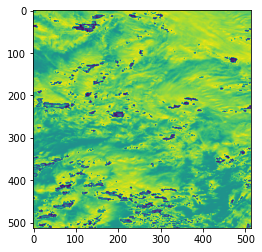

In [5]:
%matplotlib inline
plt.imshow(X_train[9,:,:,1])

In [ ]:
xr.open_dataset('/homedata/dbennour/DeepPV/CAL_CMV_slot/train_data/CAL_CMV_201601171115_201601171130.nc').to_array().values

## Data Generator

In [40]:
train_data=train_datasets[1].sel(time=slice("2018-01-01T00:00", "2018-01-02T20:00"))
test_data=test.sel(time=slice("2020-01-01T00:00", "2020-01T20:00"))

In [46]:
bgen = BatchGenerator(train_data, {'time': 1}) 

In [22]:
x_train=train_datasets[1]['CAL']
y_train=train_datasets[1][['CMV_X','CMV_Y']]
x_test=test_data['CAL']
y_test=test_data[['CMV_X','CMV_Y']]

In [3]:
data_path='/homedata/dbennour/DeepPV/CAL_CMV_slot/'
data_generator_train = CAL_CMV_DataGenerator('train_data', data_path)
data_generator_test=CAL_CMV_DataGenerator('test_data', data_path)

In [4]:
data_generator_train

In [ ]:
generator = data_generator_train.flow(batch_size=32)

# Model 1: Convolutional auto-encoder


In [10]:
import keras
from keras import layers
from keras.models import Sequential

input_img = keras.Input(shape=( 513,513,2))

x = layers.Conv2D(16, (4, 4), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (4, 4), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (4, 4), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (4, 4), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x= layers.Conv2D(2, (4, 4), activation='sigmoid', padding='same')(x)
decoded = layers.Cropping2D(cropping=((1, 0), (1, 0)), data_format=None)(x) 

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='MeanSquaredError')


In [11]:
autoencoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 513, 513, 2)]     0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 513, 513, 16)      528       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 257, 257, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 257, 257, 8)       2056      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 129, 129, 8)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 129, 129, 8)       1032      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 65, 65, 8)        

In [ ]:
from keras.callbacks import TensorBoard
batch_size=8
autoencoder.fit(data_generator_train,
                epochs=5,
                shuffle=False,
                validation_data=data_generator_test,
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])


Epoch 1/5
 15/303 [>.............................] - ETA: 43:11 - loss: 0.2236

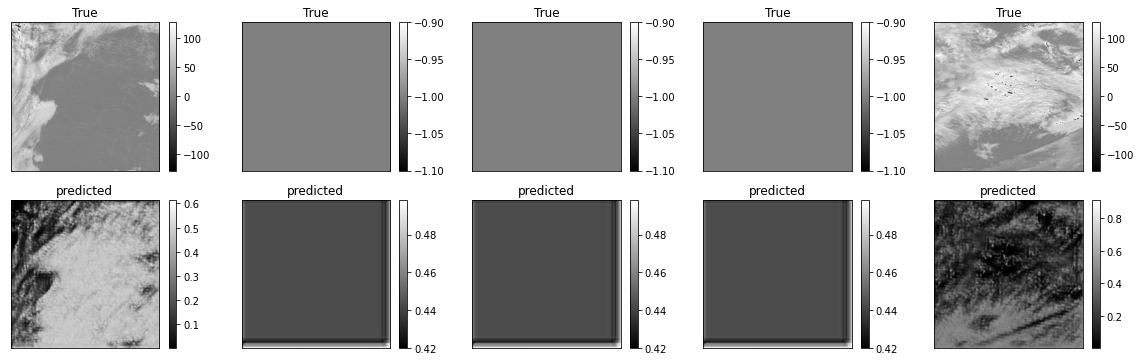

In [12]:
decoded_imgs = autoencoder.predict(X_test)
%matplotlib inline
n = 5
plt.figure(figsize=(20, 6))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    im1=plt.imshow(X_test[i,:,:,0],cmap='gray')
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('True')
    plt.colorbar(im1)
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    im2=plt.imshow(decoded_imgs[i,:,:,0],cmap='gray')
#     plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.title('predicted')
    plt.colorbar(im2)
plt.show()


In [11]:
np.unique(decoded_imgs[0,:,:,0])

array([2.0649659e-06, 3.7014768e-06, 5.3209897e-06, ..., 7.5723404e-01,
       8.4363413e-01, 9.3489742e-01], dtype=float32)

In [12]:
X_test[0,:,:,0]

array([[ 122,   97,   97, ...,  102,  101,   98],
       [ 124,  115,  104, ...,   99,  100,   98],
       [-119,  121,  110, ...,   92,   97,   98],
       ...,
       [  72,   74,   78, ...,    0,    5,    2],
       [  76,   71,   63, ...,    3,    0,    5],
       [  78,   79,   74, ...,    0,    3,    1]], dtype=int8)

# Model 2: LSTM 